In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<AxesSubplot:>

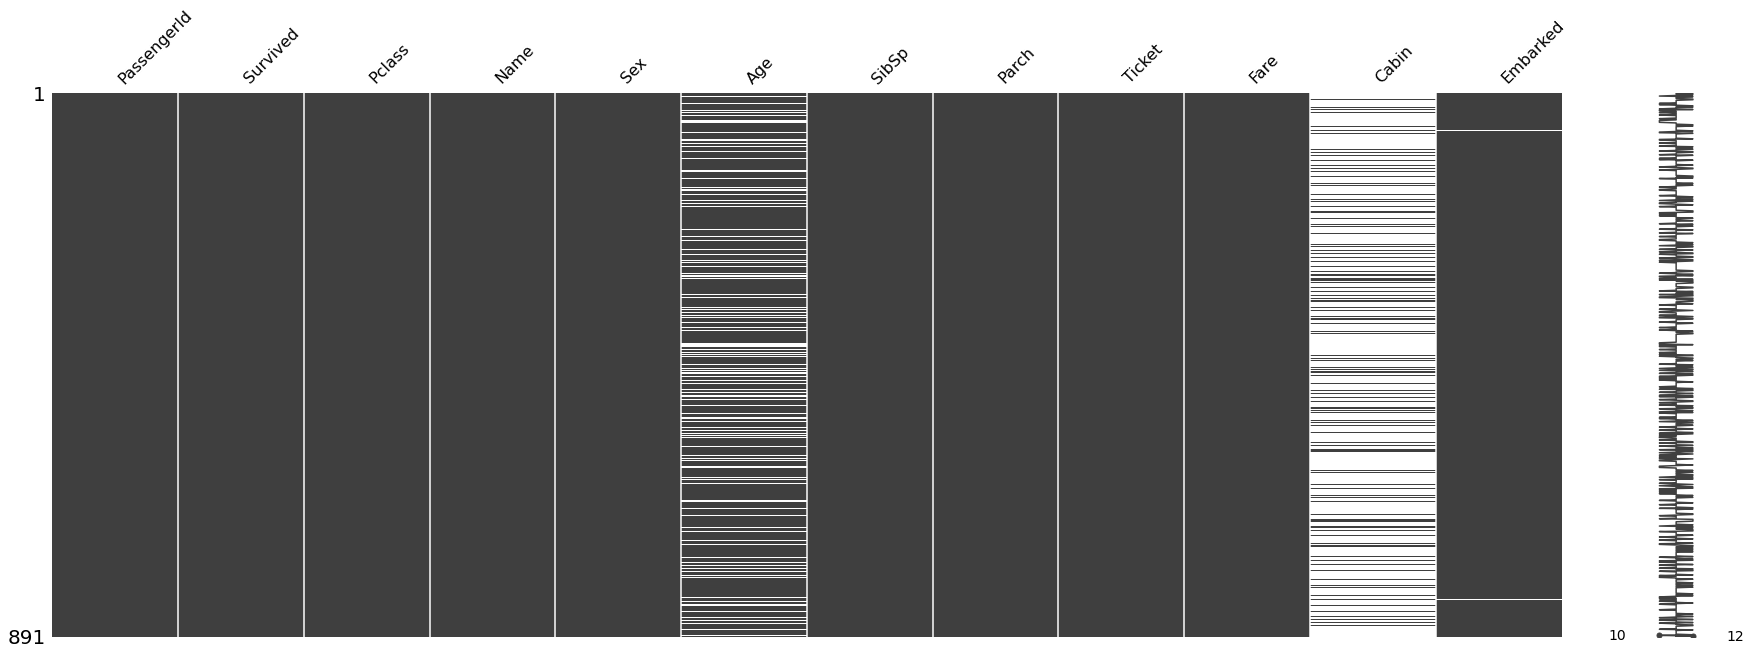

In [5]:
missingno.matrix(train_data,figsize = (30,10))

In [6]:
def missing_values_per_column(df,columns):
    missing_value = {}
    lenght = len(df)
    for col in columns:
        total_values = df[col].value_counts().sum()
        missing_value[col] = lenght - total_values
    return missing_value

missing_values_per_column(train_data,train_data.columns)

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0    549
1    342
Name: Survived, dtype: int64


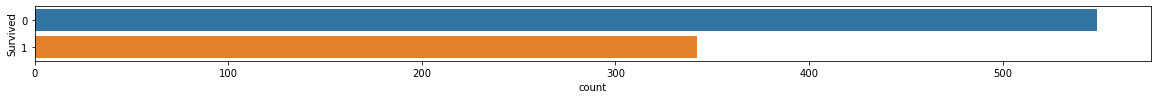

In [10]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y="Survived", data=train_data)
print(train_data.Survived.value_counts())

In [11]:
df_con['Survived'] = train_data.Survived
df_bin['Survived'] = train_data.Survived

In [12]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

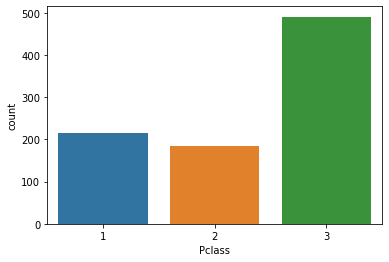

In [13]:
sns.countplot(x="Pclass", data=train_data)

In [14]:
df_con['Pclass'] = train_data.Pclass
df_bin['Pclass'] = train_data.Pclass

male      577
female    314
Name: Sex, dtype: int64


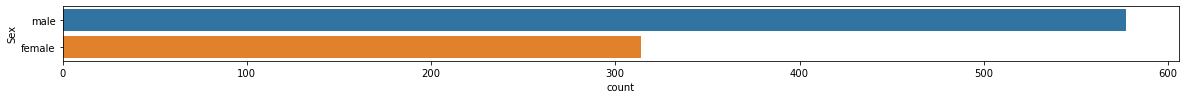

In [15]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y="Sex", data=train_data)
print(train_data.Sex.value_counts())

<AxesSubplot:xlabel='Survived', ylabel='count'>

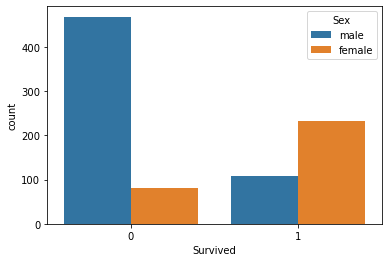

In [16]:
sns.countplot(x="Survived", hue="Sex", data=train_data)

In [17]:
df_bin['Sex'] = train_data['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female',1,0)
df_con['Sex'] = train_data['Sex']

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


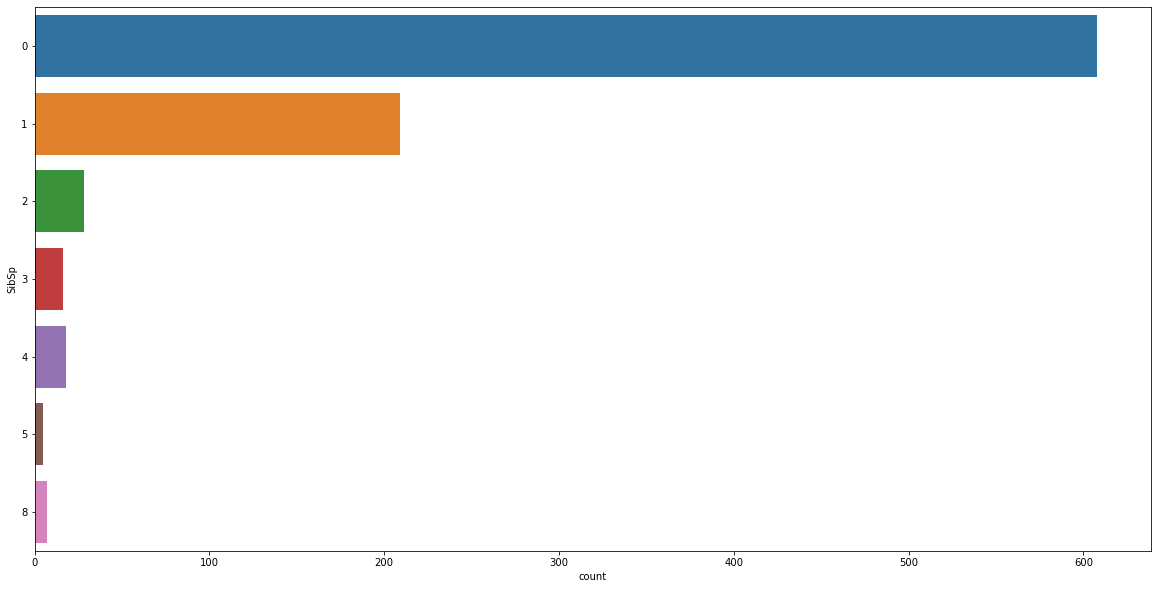

In [18]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y="SibSp", data=train_data)
print(train_data.SibSp.value_counts())

<Figure size 1440x720 with 0 Axes>

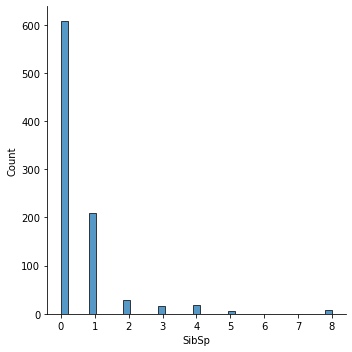

In [19]:
fig = plt.figure(figsize =(20,10))
sns.displot(train_data['SibSp'])

In [20]:
df_bin['SibSp'] = train_data['SibSp']
df_con['SibSp'] = train_data['SibSp']

In [21]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

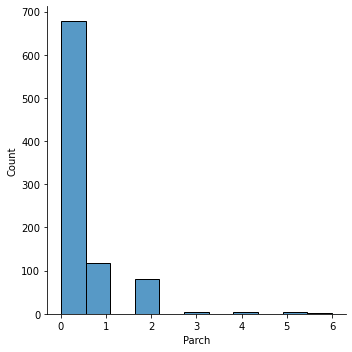

In [22]:
sns.displot(train_data['Parch'])

<AxesSubplot:xlabel='count', ylabel='Parch'>

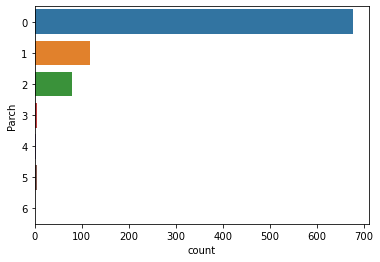

In [23]:
sns.countplot(y='Parch',data=train_data)

In [24]:
df_bin['Parch'] = train_data['Parch']
df_con['Parch'] = train_data['Parch']

In [25]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [26]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train_data['Embarked'].isnull().sum()

2

In [28]:
df_bin['Embarked'] = train_data['Embarked']
df_con['Embarked'] = train_data['Embarked']

In [30]:
df_bin = df_bin.dropna(subset=['Embarked'])
df_con = df_con.dropna(subset=['Embarked'])

In [31]:
len(df_con)

889

<AxesSubplot:xlabel='count', ylabel='Embarked'>

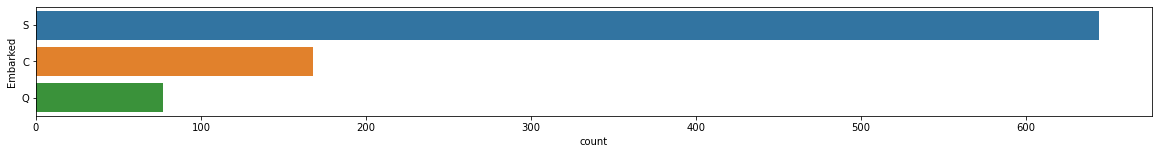

In [35]:
fig = plt.figure(figsize =(20,2))
sns.countplot(y='Embarked',data=train_data)

In [36]:
df_bin.head()

Survived  Pclass  Sex  SibSp  Parch Embarked
0         0       3    0      1      0        S
1         1       1    1      1      0        C
2         1       3    1      0      0        S
3         1       1    1      1      0        S
4         0       3    0      0      0        S

In [37]:
df_con.head()

Survived  Pclass     Sex  SibSp  Parch Embarked
0         0       3    male      1      0        S
1         1       1  female      1      0        C
2         1       3  female      0      0        S
3         1       1  female      1      0        S
4         0       3    male      0      0        S

In [48]:
one_hot_cols = df_bin.columns.values.tolist()
one_hot_cols.remove('Survived')
df_bin_esc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_esc.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  SibSp_0  SibSp_1  \
0         0         0         0         1      1      0        0        1   
1         1         1         0         0      0      1        0        1   
2         1         0         0         1      0      1        1        0   
3         1         1         0         0      0      1        0        1   
4         0         0         0         1      1      0        1        0   

   SibSp_2  SibSp_3  ...  Parch_0  Parch_1  Parch_2  Parch_3  Parch_4  \
0        0        0  ...        1        0        0        0        0   
1        0        0  ...        1        0        0        0        0   
2        0        0  ...        1        0        0        0        0   
3        0        0  ...        1        0        0        0        0   
4        0        0  ...        1        0        0        0        0   

   Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0        0        0           0           0           1  
1        0        0           1           0           0  
2        0        0           0           0           1  
3        0        0           0           0           1  
4        0        0           0           0           1  

[5 rows x 23 columns]

In [49]:
df_con_esc = df_con.apply(LabelEncoder().fit_transform)
df_con_esc.head()

Survived  Pclass  Sex  SibSp  Parch  Embarked
0         0       2    1      1      0         2
1         1       0    0      1      0         0
2         1       2    0      0      0         2
3         1       0    0      1      0         2
4         0       2    1      0      0         2

In [50]:
selected_df = df_con_esc

In [51]:
X = selected_df.drop('Survived', axis=1)
y = selected_df.Survived

In [57]:
def run_model(algo,X,y,cv):
    model = algo.fit(X,y)
    acc = round(model.score(X,y)*100,2)
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X, 
                                                  y, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [58]:
train_pred_log, acc_log, acc_cv_log = run_model(LogisticRegression(),X,y,10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 79.08
Accuracy CV 10-Fold: 78.4


In [65]:
train_pred_knn, acc_knn, acc_cv_knn = run_model(KNeighborsClassifier(),X,y,10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 82.45
Accuracy CV 10-Fold: 78.29


In [67]:
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = run_model(GaussianNB(),X,y,10)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

Accuracy: 78.85
Accuracy CV 10-Fold: 78.29


In [69]:
train_pred_linear_svc, acc_linear_svc, acc_cv_linear_svc = run_model(LinearSVC(),X,y,10)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

Accuracy: 79.53
Accuracy CV 10-Fold: 78.85


In [70]:
train_pred_sgd, acc_sgd, acc_cv_sgd = run_model(SGDClassifier(),X,y,10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

Accuracy: 79.08
Accuracy CV 10-Fold: 73.9


In [71]:
train_pred_dt, acc_dt, acc_cv_dt = run_model(DecisionTreeClassifier(),X,y,10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 83.69
Accuracy CV 10-Fold: 80.09


In [72]:
train_pred_gbc, acc_gbc, acc_cv_gbc = run_model(GradientBoostingClassifier(),X,y,10)
print("Accuracy: %s" % acc_gbc)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbc)

Accuracy: 82.23
Accuracy CV 10-Fold: 79.3


In [75]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'
             ],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbc
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


Model  Score
5               Decision Tree  83.69
0                         KNN  82.45
1         Logistic Regression  82.23
6     Gradient Boosting Trees  82.23
4                  Linear SVC  79.53
3  Stochastic Gradient Decent  79.08
2                 Naive Bayes  78.85

In [76]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbc
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


Model  Score
5               Decision Tree  80.09
1         Logistic Regression  79.30
6     Gradient Boosting Trees  79.30
4                  Linear SVC  78.85
0                         KNN  78.29
2                 Naive Bayes  78.29
3  Stochastic Gradient Decent  73.90